# Sklearn

Library de machine learn:
  * Classification
  * Regression
  * Clustering
  * Reduction de dimension (=features, pca...)

http://scikit-learn.org/stable/


Attetion sklearn travail sur des object numpy.ndarray donc il faut passer du DataFrame vers numpy avecs .values

Plan :
  * Réduction de dimension
  * Clustering
  * Prédiction SVM (SVC) / RandomForest
  * Exercice



# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


# load dataset

In [62]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


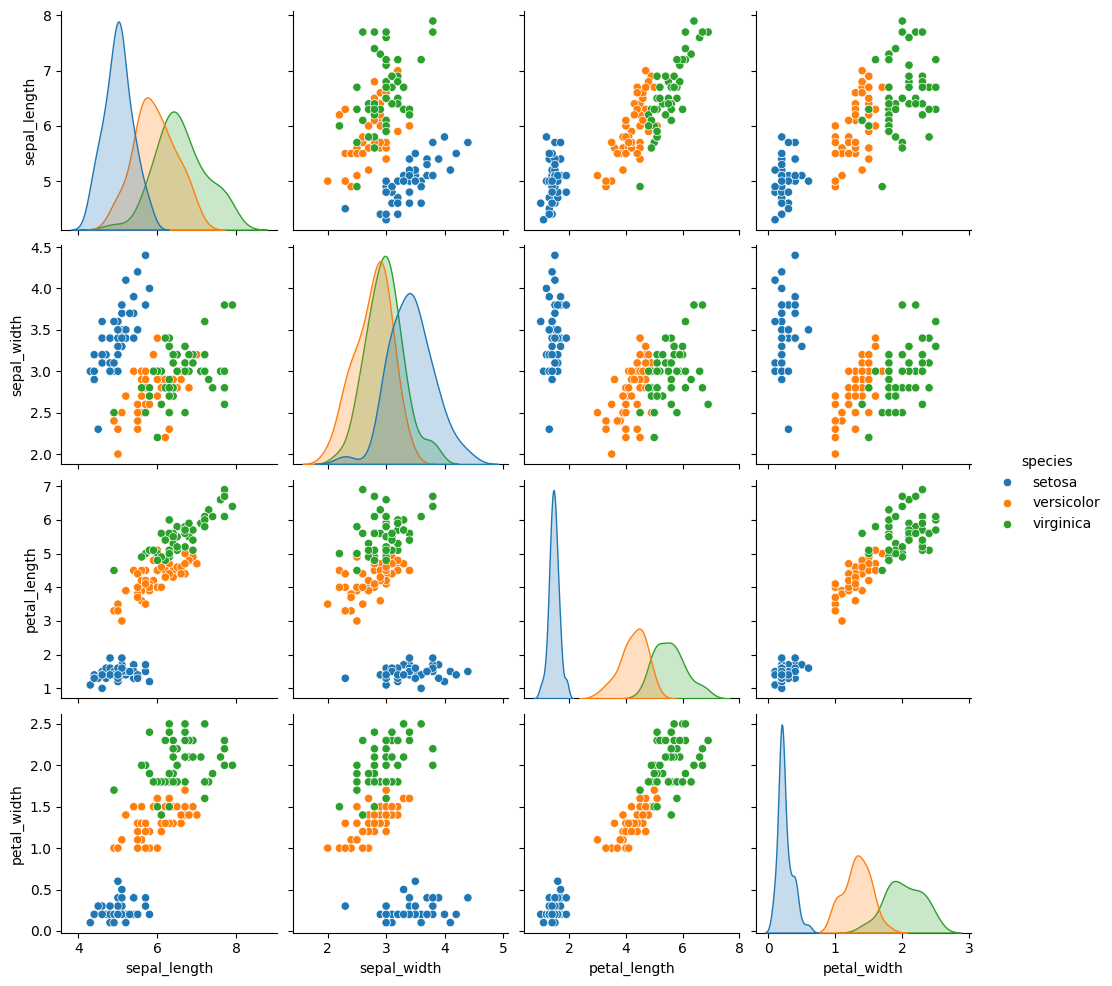

In [4]:
sns.pairplot(iris, hue="species")

# 1) Features reduction, example avec PCA

In [ ]:
X = iris.drop('species', axis=1).values
Y = iris['species'].values
features = iris.columns[:-1]
target = iris.columns[-1]

print(features)
print(np.unique(Y))

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
['setosa' 'versicolor' 'virginica']


In [28]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = sklearn.decomposition.PCA(n_components=2)  # 2 composantes principales
X_pca = pca.fit_transform(X_scaled)

iris_pca = pd.DataFrame(X_pca, columns=['pca0', 'pca1'], index=iris.index)
iris_pca

,pca0,pca1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


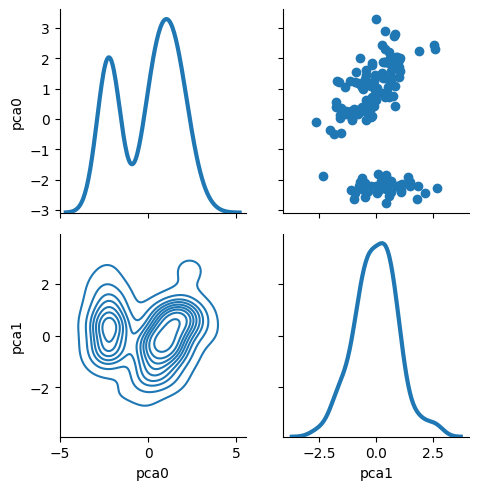

In [33]:
g = sns.PairGrid(iris_pca, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

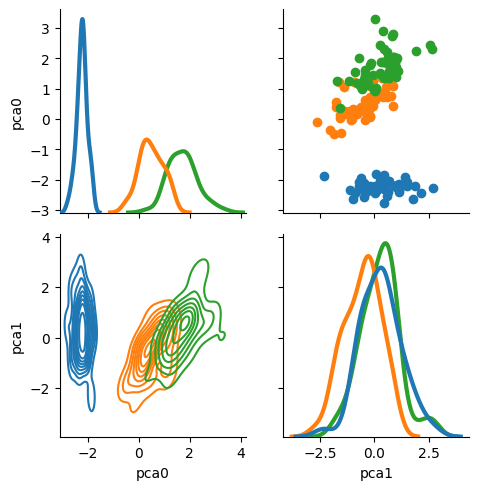

In [35]:
g = sns.PairGrid(iris_pca, diag_sharey=False, hue="species")
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [36]:
pca.explained_variance_ratio_


array([0.72962445, 0.22850762])

In [37]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [38]:
pca.components_.T

array([[ 0.52106591,  0.37741762],
       [-0.26934744,  0.92329566],
       [ 0.5804131 ,  0.02449161],
       [ 0.56485654,  0.06694199]])

Formule de la projection = multiplication matriciel (changement de repere)

$proj = ((data - mean(data)) \cdot components^T $

In [39]:
data_pca2 = np.dot(X_scaled-np.mean(X_scaled, axis=0), pca.components_.T)

In [40]:
proj = pd.DataFrame(pca.components_.T, index=iris.columns[:-1], columns=['pca0', 'pca1'])
proj

,pca0,pca1
sepal_length,0.521066,0.377418
sepal_width,-0.269347,0.923296
petal_length,0.580413,0.024492
petal_width,0.564857,0.066942


(-1.0, 1.0)

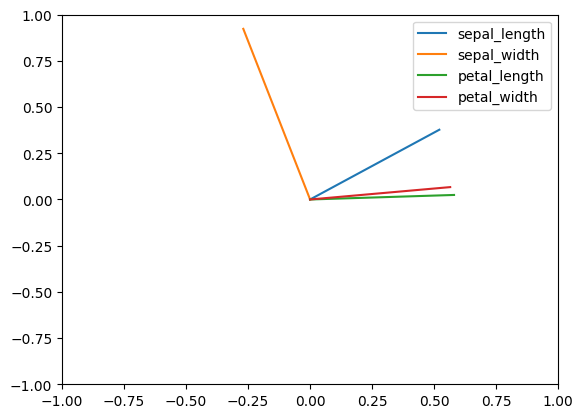

In [41]:
fig, ax = plt.subplots()
#ax.plot(iris_pca['pca0'],iris_pca['pca1'], ls='None', marker='.' )
for feat, row in proj.iterrows():
    ax.plot([0,row['pca0']], [0, row['pca1']], label=feat)
ax.legend()
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)


# 2) Clustering

In [89]:
y_kmeans = sklearn.cluster.KMeans(n_clusters=3).fit_predict(X_scaled)
Y_pred = iris.copy()
Y_pred['pred_kmeans'] = y_kmeans
Y_pred

,sepal_length,sepal_width,petal_length,petal_width,species,pred_kmeans
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [108]:
y_kmeans_inverted = y_kmeans.copy()
y_kmeans_inverted[y_kmeans == 0] = 1
y_kmeans_inverted[y_kmeans == 1] = 0
y_kmeans_inverted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
vec_int = sklearn.preprocessing.LabelEncoder().fit_transform(Y)
vec_int

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

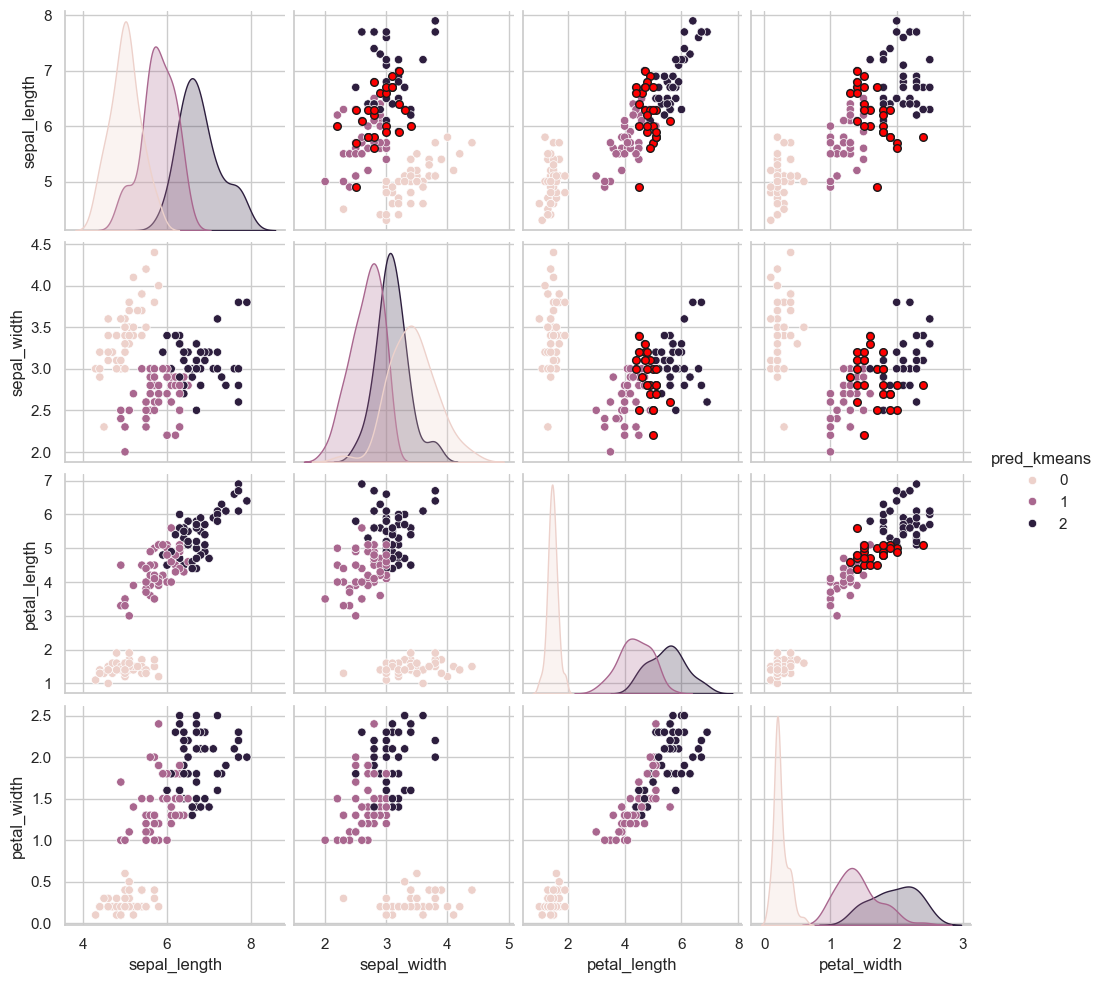

In [113]:

# Création DataFrame
df = pd.DataFrame(X, columns=features)
df['true_label'] = vec_int
df['pred_kmeans'] = y_kmeans_inverted
df['error'] = df['true_label'] != df['pred_kmeans']

# Affichage avec pairplot
# Les points incorrects sont surlignés en rouge par un style spécial
pair = sns.pairplot(df, vars=features, hue="pred_kmeans")

# Ajouter les points d'erreur en rouge
for i, j in zip(*np.triu_indices_from(pair.axes, 1)):
    ax = pair.axes[i, j]
    ax.scatter(
        df.loc[df['error'], features[j]],
        df.loc[df['error'], features[i]],
        color='red', s=30, label='Erreur', edgecolor='k'
    )

plt.show()

# 3) Classification (supervisé)

On des données avec plusieurs variables. On connais le label (ou une autre variable) pour un sous ensemble et on veut predir ce label (ou autre varibale) pour le reste du dataset.




## SVC = C-Support Vector Classification


creation d'un categorie

In [126]:
X = iris.drop('species', axis=1).values
y_str = iris['species'].values
y = sklearn.preprocessing.LabelEncoder().fit_transform(y_str)


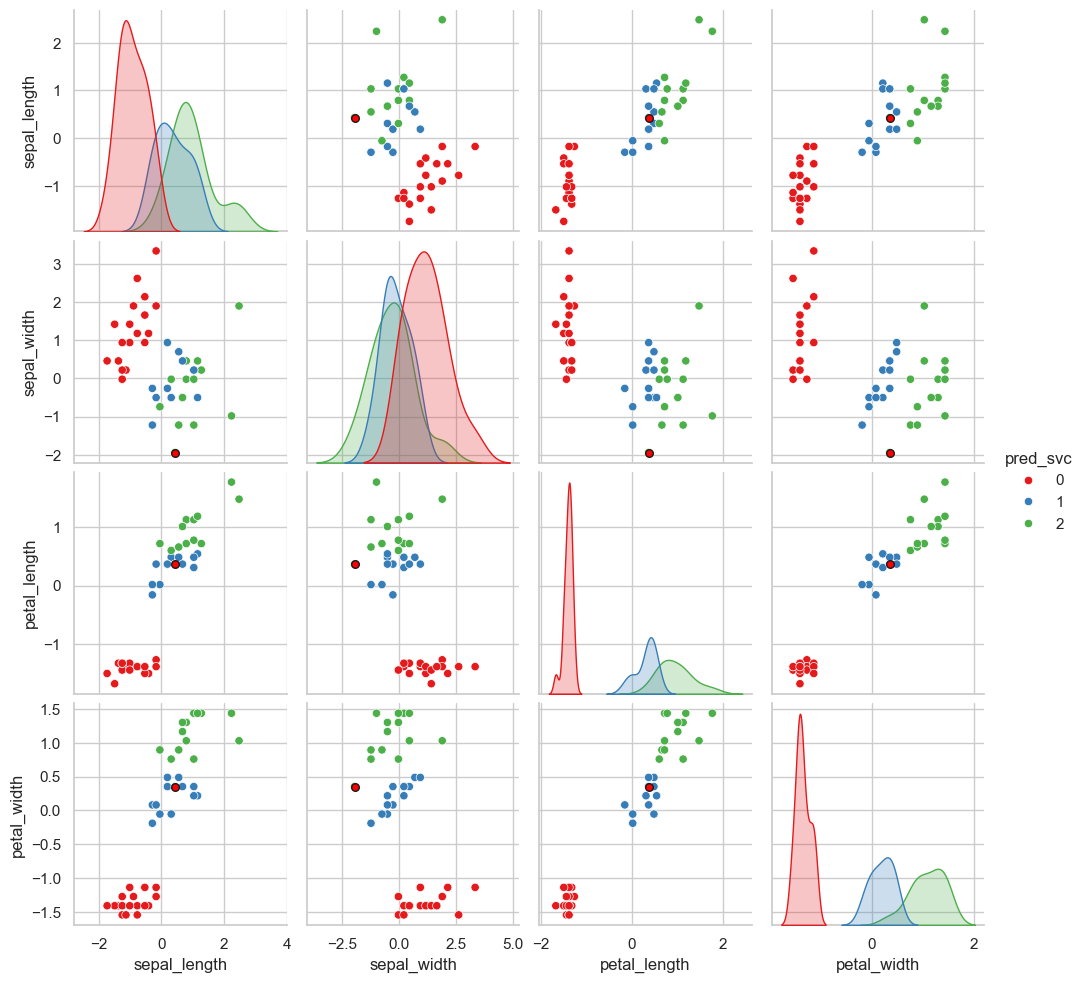

In [ ]:
# Diviser les données en train et test
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

# Standardiser les données
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entraîner le modèle SVC
svc_model = sklearn.svm.SVC(kernel='linear')  # Choisir un noyau linéaire pour simplifier
svc_model.fit(X_train, y_train)

# Prédictions
y_pred = svc_model.predict(X_test)

# Créer un DataFrame pour les visualisations
df = pd.DataFrame(X_test, columns=features)
df['true_label'] = y_test
df['pred_svc'] = y_pred
df['error'] = df['true_label'] != df['pred_svc']

# Affichage avec pairplot
pair = sns.pairplot(df, vars=features, hue="pred_svc", palette='Set1')

# Ajouter les points d'erreur en rouge
for i, j in zip(*np.triu_indices_from(pair.axes, 1)):  # Boucle pour les paires de variables
    ax = pair.axes[i, j]
    # Placer les erreurs (là où true_label != pred_svc) en rouge
    ax.scatter(
        df.loc[df['error'], features[j]], 
        df.loc[df['error'], features[i]],  
        color='red', s=30, label='Erreur', edgecolor='k', zorder=5
    )
    
    # Ajouter également les erreurs dans l'autre triangle (partie inférieure)
    ax = pair.axes[j, i]
    ax.scatter(
        df.loc[df['error'], features[i]],  
        df.loc[df['error'], features[j]],  
        color='red', s=30, label='Erreur', edgecolor='k', zorder=5
    )

plt.show()


In [149]:
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(sklearn.metrics.classification_report(y_test, y_pred))

Accuracy: 97.78%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



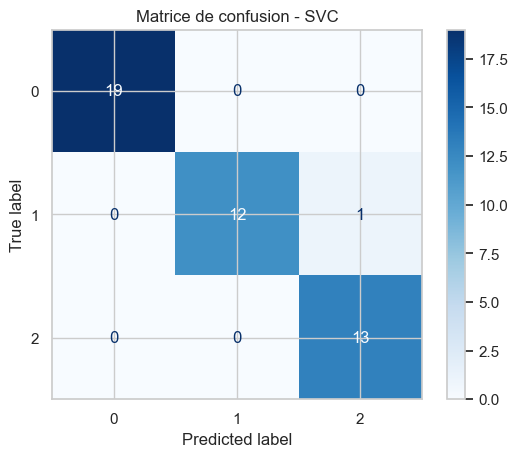

In [ ]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')
plt.title("Matrice de confusion - SVC")
plt.show()

## cross validation

In [ ]:
svc_pipeline = sklearn.pipeline.make_pipeline(sklearn.preprocessing.StandardScaler(), sklearn.svm.SVC(kernel='linear'))

In [151]:
scores = sklearn.model_selection.cross_val_score(svc_pipeline, X, y, cv=4, scoring='accuracy')
scores

array([0.97368421, 0.94736842, 0.94594595, 1.        ])

## RandomForest

In [153]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

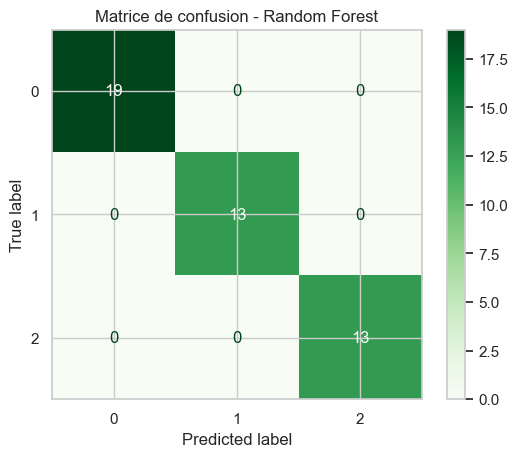

Classification Report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Greens')
plt.title("Matrice de confusion - Random Forest")
plt.show()

# Rapport de classification
print("Classification Report :\n")
print(sklearn.metrics.classification_report(y_test, y_pred))

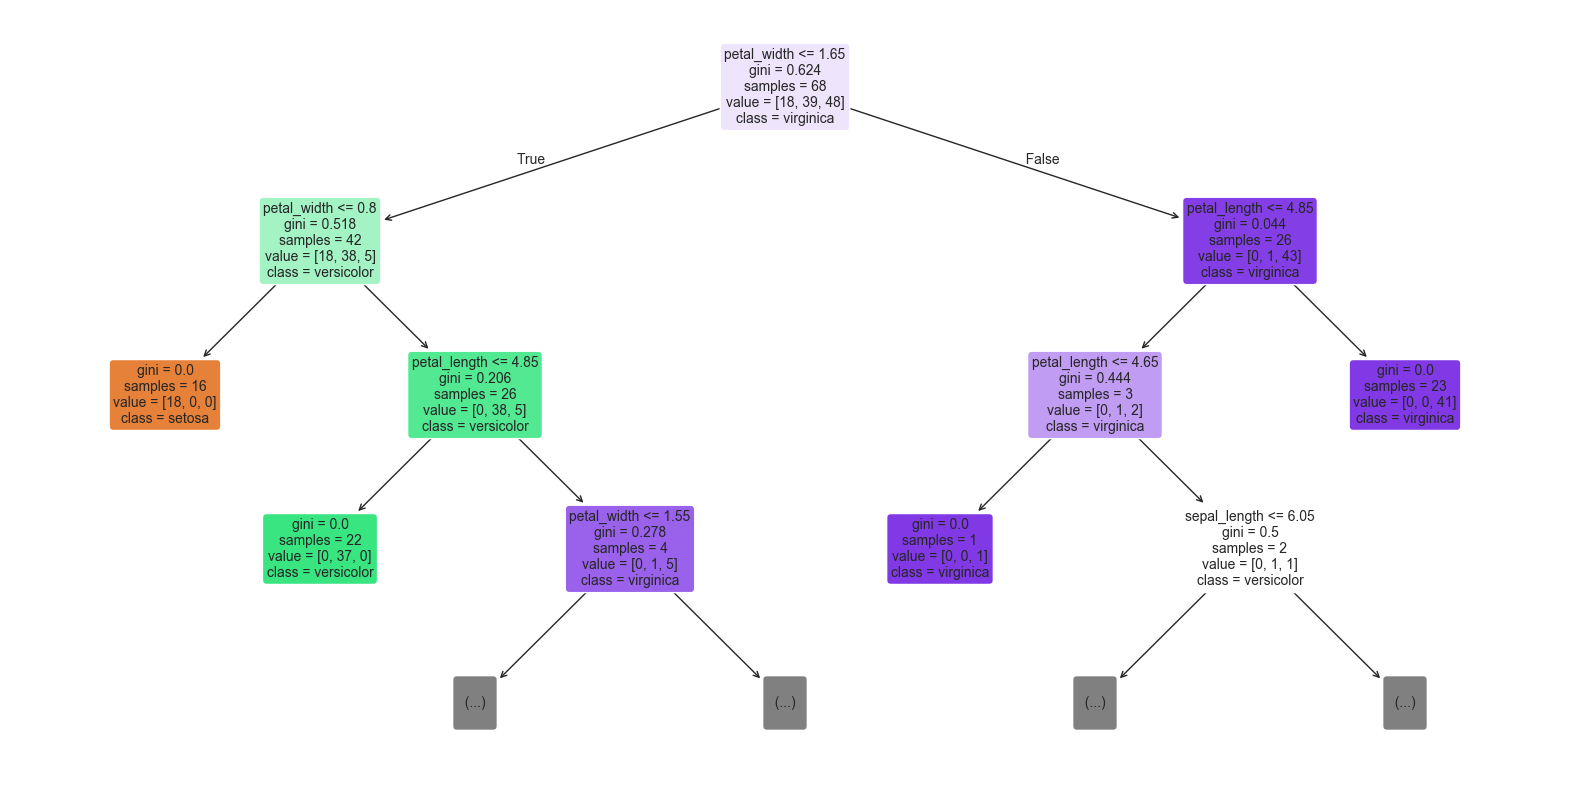

In [162]:
plt.figure(figsize=(20, 10))
sklearn.tree.plot_tree(clf.estimators_[0], 
          feature_names=features, 
          class_names=np.unique(y_str),
          filled=True, rounded=True,
          max_depth=3, fontsize=10)
plt.show()

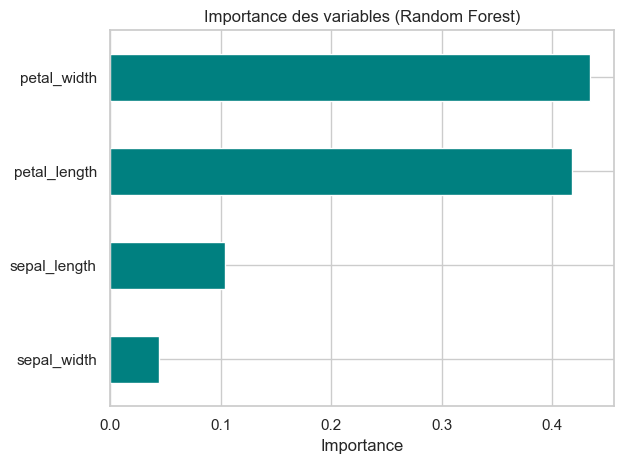

In [167]:
importances = clf.feature_importances_
forest_importances = pd.Series(importances, index=features)

forest_importances.sort_values().plot(kind='barh', color='teal')
plt.xlabel("Importance")
plt.title("Importance des variables (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4) Exercice

On va utiliser le dataset titanic pour predire la survie des individus.

Etapes:
 1. Lire le dataset
 2. Garder seulemennt les colonnes ['Survived', 'Age', 'Fare', 'Sex', 'Embarked']
 3. Faire la classification
 4. Faire le compte rendu



# Solution 

In [170]:
passenger = pd.read_excel('dataset_titanic.xlsx')
passenger

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:


columns = ['Survived', 'Age', 'Fare', 'Sex', 'Embarked']
data = passenger[columns]

# on enleve les valeurs manquantes
mask = np.all(data.notnull(), axis=1)
data = data[mask]

# on transform les labels en chiffre
for col in ('Sex', 'Embarked'):
    data[col] = sklearn.preprocessing.LabelEncoder().fit_transform(data[col])
data



,Survived,Age,Fare,Sex,Embarked
0,0,22.0,7.2500,1,2
1,1,38.0,71.2833,0,0
2,1,26.0,7.9250,0,2
3,1,35.0,53.1000,0,2
4,0,35.0,8.0500,1,2
...,...,...,...,...,...
885,0,39.0,29.1250,0,1
886,0,27.0,13.0000,1,2
887,1,19.0,30.0000,0,2
889,1,26.0,30.0000,1,0


In [ ]:
y = data['Survived'].values
X = data[columns[1:]].values

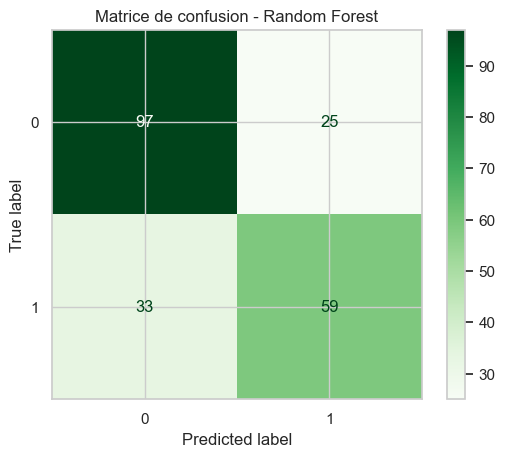

Classification Report :

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       122
           1       0.70      0.64      0.67        92

    accuracy                           0.73       214
   macro avg       0.72      0.72      0.72       214
weighted avg       0.73      0.73      0.73       214



In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Greens')
plt.title("Matrice de confusion - Random Forest")
plt.show()

# Rapport de classification
print("Classification Report :\n")
print(sklearn.metrics.classification_report(y_test, y_pred))

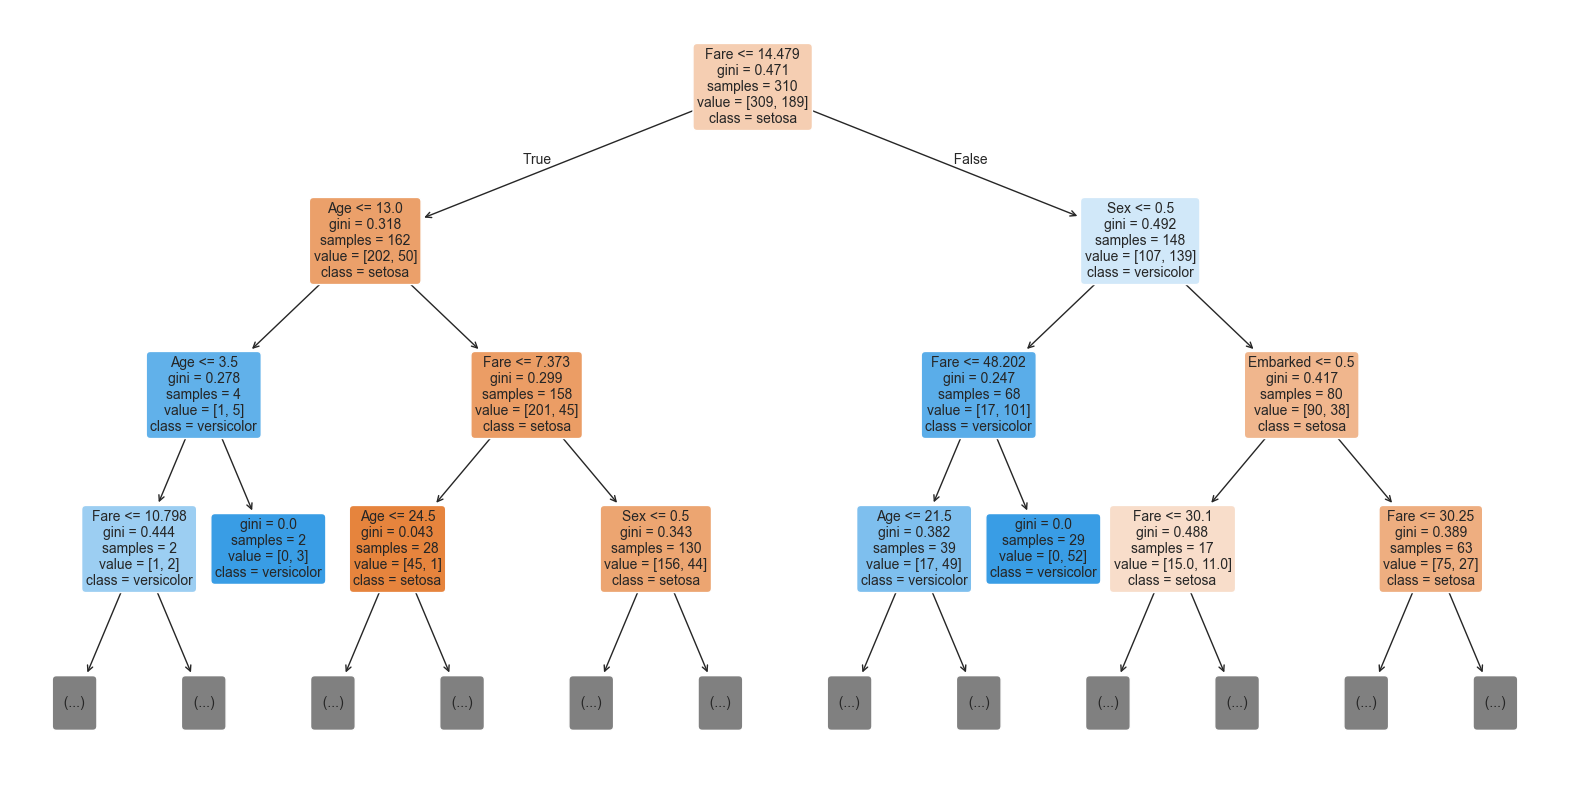

In [180]:
plt.figure(figsize=(20, 10))
sklearn.tree.plot_tree(clf.estimators_[0], 
          feature_names=data[columns[1:]].columns, 
          class_names=np.unique(y_str),
          filled=True, rounded=True,
          max_depth=3, fontsize=10)
plt.show()

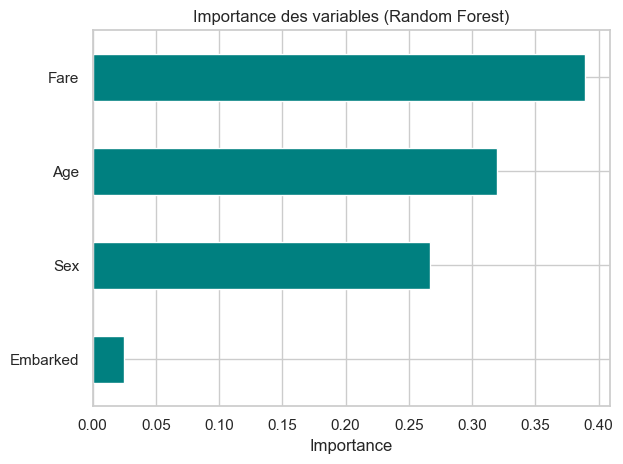

In [182]:
importances = clf.feature_importances_
forest_importances = pd.Series(importances, index=data[columns[1:]].columns)

forest_importances.sort_values().plot(kind='barh', color='teal')
plt.xlabel("Importance")
plt.title("Importance des variables (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()